In [1]:
# Import Dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np  
import csv 
import datetime as dt

# From Census, pull the Population, Median Income, Poverty Count and Poverty Rate by Zipcode 

In [78]:
# Census Dependencies
# Census API Key
from config import (census_key, gkey)
from census import Census
c = Census(census_key, year=2018)

# Get the Population, Poverty Count, Median Household Income for the zipcode level
census_data = c.acs5.get(("B01003_001E", "B17001_002E", "B19013_001E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_df = pd.DataFrame(census_data)
census_df

,B01003_001E,B17001_002E,B19013_001E,zip code tabulation area
0,17242.0,10772.0,13092.0,00601
1,38442.0,19611.0,16358.0,00602
2,48814.0,24337.0,16603.0,00603
3,6437.0,4163.0,12832.0,00606
4,27073.0,11724.0,19309.0,00610
...,...,...,...,...
33115,15.0,0.0,-666666666.0,99923
33116,927.0,172.0,57375.0,99925
33117,1635.0,235.0,53409.0,99926
33118,38.0,28.0,-666666666.0,99927


In [79]:
# Column Reordering
census_df = census_df.rename(columns={"B01003_001E": "population",
                                      "B17001_002E": "poverty_count",
                                      "B19013_001E": "median_household_income",
                                      "zip code tabulation area": "zipcode"})
census_df

,population,poverty_count,median_household_income,zipcode
0,17242.0,10772.0,13092.0,00601
1,38442.0,19611.0,16358.0,00602
2,48814.0,24337.0,16603.0,00603
3,6437.0,4163.0,12832.0,00606
4,27073.0,11724.0,19309.0,00610
...,...,...,...,...
33115,15.0,0.0,-666666666.0,99923
33116,927.0,172.0,57375.0,99925
33117,1635.0,235.0,53409.0,99926
33118,38.0,28.0,-666666666.0,99927


In [80]:
# Add in Poverty Rate (Poverty Count / Population)
census_df["poverty_rate"] = (census_df["poverty_count"]/census_df["population"])*100
row_count = len(census_df)

print(f"Total number of records: {row_count}")
census_df

Total number of records: 33120


,population,poverty_count,median_household_income,zipcode,poverty_rate
0,17242.0,10772.0,13092.0,00601,62.475351
1,38442.0,19611.0,16358.0,00602,51.014515
2,48814.0,24337.0,16603.0,00603,49.856599
3,6437.0,4163.0,12832.0,00606,64.672984
4,27073.0,11724.0,19309.0,00610,43.305138
...,...,...,...,...,...
33115,15.0,0.0,-666666666.0,99923,0.000000
33116,927.0,172.0,57375.0,99925,18.554477
33117,1635.0,235.0,53409.0,99926,14.373089
33118,38.0,28.0,-666666666.0,99927,73.684211


In [81]:
census_df.dtypes

population                 float64
poverty_count              float64
median_household_income    float64
zipcode                     object
poverty_rate               float64
dtype: object

In [82]:
# Change zipcode to integer
census_df["zipcode"] = census_df["zipcode"].astype(int)
census_df.dtypes

population                 float64
poverty_count              float64
median_household_income    float64
zipcode                      int32
poverty_rate               float64
dtype: object

In [83]:
census_clean_df = census_df.dropna(how='any')
census_clean_df

,population,poverty_count,median_household_income,zipcode,poverty_rate
0,17242.0,10772.0,13092.0,601,62.475351
1,38442.0,19611.0,16358.0,602,51.014515
2,48814.0,24337.0,16603.0,603,49.856599
3,6437.0,4163.0,12832.0,606,64.672984
4,27073.0,11724.0,19309.0,610,43.305138
...,...,...,...,...,...
33115,15.0,0.0,-666666666.0,99923,0.000000
33116,927.0,172.0,57375.0,99925,18.554477
33117,1635.0,235.0,53409.0,99926,14.373089
33118,38.0,28.0,-666666666.0,99927,73.684211


In [84]:
census_clean_df.dtypes

population                 float64
poverty_count              float64
median_household_income    float64
zipcode                      int32
poverty_rate               float64
dtype: object

# Find the count of schools per zipcode 

In [22]:
# Get the count of schools at the zipcode level
schools_data = pd.read_csv('./static/data/ij_number-of-schools.csv')
schools_data

,index,objectid,city,state,zip,county
0,0,2002,NEW SMYRNA,FL,32168,VOLUSIA
1,1,2003,WOODWORTH,LA,71485,RAPIDES
2,2,2004,BRUNSWICK,ME,4011,CUMBERLAND
3,3,2005,CARTHAGE,MS,39051,LEAKE
4,4,2006,KEARNEY,MO,64060,CLAY
...,...,...,...,...,...,...
102365,102365,102216,DETROIT,MI,48216,WAYNE
102366,102366,102217,SOUTH ROCKWOOD,MI,48179,MONROE
102367,102367,102218,DIBERVILLE,MS,39540,HARRISON
102368,102368,102219,KANSAS CITY,MO,64118,CLAY


In [23]:
# Filter for NC schools data 
nc_schools = schools_data[schools_data['state']=='NC']
nc_schools

,index,objectid,city,state,zip,county
17,17,2019,KELFORD,NC,27847,BERTIE
18,18,2020,CLYDE,NC,28721,HAYWOOD
50,50,2052,CONOVER,NC,28613,CATAWBA
106,106,2109,JACKSONVILLE,NC,28540,ONSLOW
107,107,2110,JACKSONVILLE,NC,28546,ONSLOW
...,...,...,...,...,...,...
102171,102171,102022,FAYETTEVILLE,NC,28306,CUMBERLAND
102172,102172,102023,CHARLOTTE,NC,28215,MECKLENBURG
102204,102204,102055,DURHAM,NC,27703,DURHAM
102250,102250,102101,GIBSON,NC,28343,SCOTLAND


In [26]:
# Group by zipcode to get Count of schools per zipcode
nc_schools_by_zipcode = nc_schools.groupby("zip")["objectid"].count().reset_index(name="number_of_schools")
nc_schools_by_zipcode

,zip,number_of_schools
0,27006,2
1,27011,3
2,27012,4
3,27013,2
4,27014,1
...,...,...
620,28806,12
621,28901,3
622,28904,3
623,28905,1


In [27]:
nc_schools_by_zipcode.rename(columns={"zip": "zipcode"}, inplace = True)
nc_schools_by_zipcode

,zipcode,number_of_schools
0,27006,2
1,27011,3
2,27012,4
3,27013,2
4,27014,1
...,...,...
620,28806,12
621,28901,3
622,28904,3
623,28905,1


# PREDICT 1 BEDROOM HOUSE PRICES IN NORTH CAROLINA

## Find the median house prices for 1BDRs from Zillow

In [38]:
# Read in the median house price data for 1 bedroom houses from zillow
zillow_1bdr = pd.read_csv('./static/data/Zip_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zillow_1bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,111258.0,...,717134.0,715191.0,712496.0,710656.0,709822.0,710312.0,711858.0,712502.0,712505.0,713185.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,111421.0,...,223303.0,222841.0,222420.0,222206.0,222280.0,222748.0,223201.0,223501.0,223454.0,223662.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,189781.0,...,825711.0,822467.0,819524.0,817030.0,816480.0,814888.0,813952.0,811516.0,810034.0,810253.0
3,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,128112.0,...,256844.0,256048.0,255162.0,254278.0,253906.0,254028.0,254544.0,255105.0,255632.0,256315.0
4,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,90479.0,...,143300.0,144023.0,143852.0,144365.0,144387.0,144938.0,145457.0,146069.0,146871.0,147265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18970,93901,34322,82310,Zip,WY,WY,Lander,Riverton,Fremont County,NaN,...,123097.0,122771.0,122484.0,122272.0,122153.0,122133.0,122216.0,122184.0,122161.0,122681.0
18971,60206,34322,6230,Zip,CT,CT,Pomfret Center,Worcester,Windham County,NaN,...,166053.0,165630.0,166116.0,166324.0,166953.0,168296.0,169756.0,171444.0,171391.0,171773.0
18972,58952,34322,2872,Zip,RI,RI,Portsmouth,Providence-Warwick,Newport County,NaN,...,210967.0,211174.0,210084.0,209667.0,209826.0,210325.0,211226.0,210734.0,208224.0,204365.0
18973,95186,34430,86343,Zip,AZ,AZ,Crown King,Prescott,Yavapai County,NaN,...,130634.0,130108.0,128893.0,126910.0,124603.0,122835.0,122696.0,122715.0,121320.0,118177.0


In [39]:
# Reformat the date columns to reduce the number of columns for 1BDR dataset
df_1bdr = pd.melt(zillow_1bdr, id_vars=['RegionID', 
                                        'SizeRank', 
                                        'RegionName', 
                                        'RegionType', 
                                        'StateName',
                                        'State', 
                                        'City',
                                        'Metro', 
                                        'CountyName']) 

# Add a new column to identify number of bedrooms
df_1bdr["number_of_bedrooms"] = 1

# Convert date to "seconds to use in predictions
df_1bdr["variable"] = df_1bdr["variable"].astype('datetime64[m]')
df_1bdr["epoch"] = (df_1bdr["variable"] - dt.datetime(1970,1,1)).dt.total_seconds()

# Drop missing data
df_1bdr = df_1bdr.dropna(how="any")
df_1bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,number_of_bedrooms,epoch
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,111258.0,1,8.230464e+08
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,111421.0,1,8.230464e+08
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,189781.0,1,8.230464e+08
3,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,128112.0,1,8.230464e+08
4,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,90479.0,1,8.230464e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578645,93901,34322,82310,Zip,WY,WY,Lander,Riverton,Fremont County,2020-06-30,122681.0,1,1.593475e+09
5578646,60206,34322,6230,Zip,CT,CT,Pomfret Center,Worcester,Windham County,2020-06-30,171773.0,1,1.593475e+09
5578647,58952,34322,2872,Zip,RI,RI,Portsmouth,Providence-Warwick,Newport County,2020-06-30,204365.0,1,1.593475e+09
5578648,95186,34430,86343,Zip,AZ,AZ,Crown King,Prescott,Yavapai County,2020-06-30,118177.0,1,1.593475e+09


In [53]:
# Final 1 BDR dataset
df_1bdr_clean = df_1bdr[["RegionName", "State", "City", "variable", "value", "number_of_bedrooms", "epoch"]]

# Rename columns 
df_1bdr_clean.rename(columns={"RegionName": "zipcode",
                              "State": "state",
                              "City": "city",
                            "variable": "date",
                            "value": "median_house_price",
                            "epoch": "datenumeric"}, inplace = True)

df_1bdr_clean

,zipcode,state,city,date,median_house_price,number_of_bedrooms,datenumeric
0,10025,NY,New York,1996-01-31,111258.0,1,8.230464e+08
1,60657,IL,Chicago,1996-01-31,111421.0,1,8.230464e+08
2,10023,NY,New York,1996-01-31,189781.0,1,8.230464e+08
3,60614,IL,Chicago,1996-01-31,128112.0,1,8.230464e+08
4,77449,TX,Katy,1996-01-31,90479.0,1,8.230464e+08
...,...,...,...,...,...,...,...
5578645,82310,WY,Lander,2020-06-30,122681.0,1,1.593475e+09
5578646,6230,CT,Pomfret Center,2020-06-30,171773.0,1,1.593475e+09
5578647,2872,RI,Portsmouth,2020-06-30,204365.0,1,1.593475e+09
5578648,86343,AZ,Crown King,2020-06-30,118177.0,1,1.593475e+09


In [56]:
# Filter for 1BDRs in NC only
nc_1bdr = df_1bdr_clean[df_1bdr_clean['state']=='NC']

# Find Average house price in NC grouped by Zipcode
nc_1bdr_by_zipcode = nc_1bdr.groupby(["city","zipcode"])["median_house_price"].mean().reset_index(name="avg_house_price")
nc_1bdr_by_zipcode

,city,zipcode,avg_house_price
0,Aberdeen,28315,114560.250000
1,Advance,27006,117300.225275
2,Albemarle,28001,35063.496599
3,Alexander,28701,176274.226190
4,Angier,27501,126763.427083
...,...,...,...
462,Wrightsville Beach,28480,274212.242424
463,Youngsville,27596,100356.464865
464,Zebulon,27597,114133.758865
465,Zionville,28698,123630.137725


## Merge the 1 BDR house price data, NC schools data and the census data

In [64]:
# Merge 1 BDR house prices data with the NC schools data
nc_1bdr_merged = pd.merge(nc_1bdr_by_zipcode, nc_schools_by_zipcode, on="zipcode")
nc_1bdr_merged

,city,zipcode,avg_house_price,number_of_schools
0,Aberdeen,28315,114560.250000,4
1,Advance,27006,117300.225275,2
2,Albemarle,28001,35063.496599,8
3,Angier,27501,126763.427083,5
4,Apex,27502,370912.251938,7
...,...,...,...,...
401,Winterville,28590,57159.475000,5
402,Wrightsville Beach,28480,274212.242424,1
403,Youngsville,27596,100356.464865,3
404,Zebulon,27597,114133.758865,5


In [86]:
# Merge 1 BDR house prices and schools data with the census data
nc_1bdr_final = pd.merge(nc_1bdr_merged, census_clean_df, on="zipcode")
nc_1bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,114560.250000,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,117300.225275,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,35063.496599,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,126763.427083,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,370912.251938,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
401,Winterville,28590,57159.475000,5,24613.0,2747.0,65594.0,11.160769
402,Wrightsville Beach,28480,274212.242424,1,2536.0,216.0,83417.0,8.517350
403,Youngsville,27596,100356.464865,3,18359.0,1624.0,70535.0,8.845798
404,Zebulon,27597,114133.758865,5,23538.0,2995.0,58514.0,12.724106


## Build the Linear regression model and predict house prices for 1 BDRs in NC

In [91]:
# Convert City to a cetegorical variable
nc_1bdr_final["city"] = nc_1bdr_final["city"].astype('category')
nc_1bdr_final["city"] = nc_1bdr_final["city"].cat.codes
nc_1bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,0,28315,114560.250000,4,13700.0,2826.0,51725.0,20.627737
1,1,27006,117300.225275,2,14555.0,932.0,78095.0,6.403298
2,2,28001,35063.496599,8,26601.0,5208.0,45121.0,19.578211
3,3,27501,126763.427083,5,21299.0,2601.0,56338.0,12.211841
4,4,27502,370912.251938,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
401,298,28590,57159.475000,5,24613.0,2747.0,65594.0,11.160769
402,299,28480,274212.242424,1,2536.0,216.0,83417.0,8.517350
403,300,27596,100356.464865,3,18359.0,1624.0,70535.0,8.845798
404,301,27597,114133.758865,5,23538.0,2995.0,58514.0,12.724106


In [127]:
# Define dependent and independent variables
X_1bdr = nc_1bdr_final[["city","population","median_household_income", "number_of_schools", "poverty_rate"]]
y_1bdr = nc_1bdr_final["avg_house_price"].values.reshape(-1,1)

In [128]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_1bdr, X_test_1bdr, y_train_1bdr, y_test_1bdr = train_test_split(X_1bdr, y_1bdr, random_state=42)

In [129]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_1bdr = LinearRegression()

In [130]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_1bdr.fit(X_train_1bdr, y_train_1bdr)
training_score_1bdr = model_1bdr.score(X_train_1bdr, y_train_1bdr)
testing_score_1bdr = model_1bdr.score(X_test_1bdr, y_test_1bdr)

# Print Scores
print(f"1 BDR Training Score: {training_score_1bdr}")
print(f"1 BDR Testing Score: {testing_score_1bdr}")

Training Score: 0.32352764928519195
Testing Score: 0.24428716528909622


Mean Squared Error (MSE): 2156207420.24016
R-squared (R2 ): 0.24428716528909622


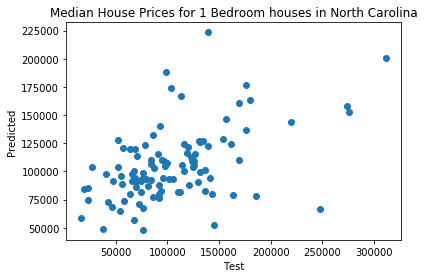

In [132]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_1bdr = model_1bdr.predict(X_test_1bdr)

# Score the predictions with mse and r2
mse_1bdr = mean_squared_error(y_test_1bdr, predicted_1bdr)
r2_1bdr = r2_score(y_test_1bdr, predicted_1bdr)
print(f"1 BDR Mean Squared Error (MSE): {mse_1bdr}")
print(f"1 BDR R-squared (R2 ): {r2_1bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_1bdr,predicted_1bdr)

# Label plot
plt.xlabel('1 BDR Test')
plt.ylabel('1 BDR Predicted')

plt.title('Median House Prices for 1 BDR houses in North Carolina')

# Save Plot
plt.savefig('./static/images/LinearRegression_1bdr.png')

# Show plot
plt.show()

Text(0.5, 1.0, '1 BDR Residual Plot')

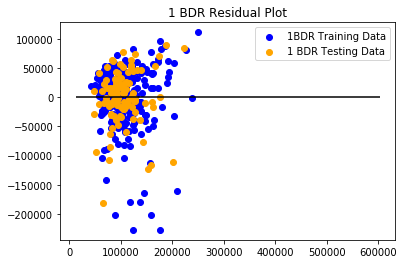

In [133]:
plt.scatter(model_1bdr.predict(X_train_1bdr), model_1bdr.predict(X_train_1bdr) - y_train_1bdr, c="blue", label="1BDR Training Data")

plt.scatter(model_1bdr.predict(X_test_1bdr), model_1bdr.predict(X_test_1bdr) - y_test_1bdr, c="orange", label="1 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y.min(), xmax=y.max())

plt.title("1 BDR Residual Plot")

# PREDICT 2 BEDROOM HOUSE PRICES IN NORTH CAROLINA

## Find the median house prices for 2 BDRs from Zillow

In [41]:
# Read in the median house price data for 2 bedroom houses from zillow
zillow_2bdr = pd.read_csv('./static/data/Zip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zillow_2bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,240504.0,...,1272702.0,1272478.0,1270556.0,1269823.0,1268361.0,1267370.0,1264233.0,1261616.0,1257309.0,1254642.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,195485.0,...,406557.0,405362.0,404016.0,403134.0,402705.0,403404.0,404434.0,405118.0,404920.0,404918.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1793212.0,1792082.0,1791911.0,1790571.0,1790385.0,1787927.0,1784664.0,1780650.0,1776264.0,1774406.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,NaN,...,262450.0,262182.0,261771.0,261487.0,260876.0,260581.0,260567.0,261577.0,262679.0,263403.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,209865.0,...,455882.0,455093.0,454120.0,453124.0,452720.0,452758.0,453321.0,452986.0,452355.0,451749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26928,59376,34430,4109,Zip,ME,ME,Portland,Portland-South Portland,Cumberland County,NaN,...,399310.0,401208.0,402618.0,403684.0,405642.0,407556.0,410153.0,411997.0,414083.0,415439.0
26929,95186,34430,86343,Zip,AZ,AZ,Crown King,Prescott,Yavapai County,NaN,...,165257.0,164938.0,165536.0,165580.0,165700.0,164858.0,164756.0,165045.0,164364.0,162475.0
26930,95851,34430,89155,Zip,NV,NV,Las Vegas,Las Vegas-Henderson-Paradise,Clark County,112135.0,...,208926.0,209286.0,210144.0,210647.0,211493.0,211980.0,213724.0,214909.0,215976.0,216217.0
26931,98400,34430,95721,Zip,CA,CA,Twin Bridges,Sacramento--Roseville--Arden-Arcade,El Dorado County,NaN,...,254243.0,252008.0,248187.0,243410.0,239707.0,239004.0,239987.0,241478.0,240997.0,240154.0


In [42]:
# Reformat the date columns to reduce the number of columns for 2BDR dataset
df_2bdr = pd.melt(zillow_2bdr, id_vars=['RegionID', 
                                        'SizeRank', 
                                        'RegionName', 
                                        'RegionType', 
                                        'StateName',
                                        'State', 
                                        'City',
                                        'Metro', 
                                        'CountyName']) 

# Add a new column to identify number of bedrooms
df_2bdr["number_of_bedrooms"] = 2

# Convert date to "seconds to use in predictions
df_2bdr["variable"] = df_2bdr["variable"].astype('datetime64[m]')
df_2bdr["epoch"] = (df_2bdr["variable"] - dt.datetime(1970,1,1)).dt.total_seconds()

# Drop missing data
df_2bdr = df_2bdr.dropna(how="any")
df_2bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,number_of_bedrooms,epoch
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,240504.0,2,8.230464e+08
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,195485.0,2,8.230464e+08
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,209865.0,2,8.230464e+08
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,67825.0,2,8.230464e+08
6,61616,6,10002,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,307036.0,2,8.230464e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7918297,59376,34430,4109,Zip,ME,ME,Portland,Portland-South Portland,Cumberland County,2020-06-30,415439.0,2,1.593475e+09
7918298,95186,34430,86343,Zip,AZ,AZ,Crown King,Prescott,Yavapai County,2020-06-30,162475.0,2,1.593475e+09
7918299,95851,34430,89155,Zip,NV,NV,Las Vegas,Las Vegas-Henderson-Paradise,Clark County,2020-06-30,216217.0,2,1.593475e+09
7918300,98400,34430,95721,Zip,CA,CA,Twin Bridges,Sacramento--Roseville--Arden-Arcade,El Dorado County,2020-06-30,240154.0,2,1.593475e+09


In [57]:
# Final 2BDR dataset
df_2bdr_clean = df_2bdr[["RegionName", "State", "City", "variable", "value", "number_of_bedrooms", "epoch"]]

# Rename columns 
df_2bdr_clean.rename(columns={"RegionName": "zipcode",
                              "State": "state",
                              "City": "city",
                            "variable": "date",
                            "value": "median_house_price",
                            "epoch": "datenumeric"}, inplace = True)
df_2bdr_clean

,zipcode,state,city,date,median_house_price,number_of_bedrooms,datenumeric
0,10025,NY,New York,1996-01-31,240504.0,2,8.230464e+08
1,60657,IL,Chicago,1996-01-31,195485.0,2,8.230464e+08
4,60614,IL,Chicago,1996-01-31,209865.0,2,8.230464e+08
5,77449,TX,Katy,1996-01-31,67825.0,2,8.230464e+08
6,10002,NY,New York,1996-01-31,307036.0,2,8.230464e+08
...,...,...,...,...,...,...,...
7918297,4109,ME,Portland,2020-06-30,415439.0,2,1.593475e+09
7918298,86343,AZ,Crown King,2020-06-30,162475.0,2,1.593475e+09
7918299,89155,NV,Las Vegas,2020-06-30,216217.0,2,1.593475e+09
7918300,95721,CA,Twin Bridges,2020-06-30,240154.0,2,1.593475e+09


In [58]:
# Filter for 2BDRs in NC only
nc_2bdr = df_2bdr_clean[df_2bdr_clean['state']=='NC']

# Find Average house price in NC grouped by Zipcode
nc_2bdr_by_zipcode = nc_2bdr.groupby(["city","zipcode"])["median_house_price"].mean().reset_index(name="avg_house_price")
nc_2bdr_by_zipcode

,city,zipcode,avg_house_price
0,Aberdeen,28315,99995.515789
1,Advance,27006,132251.410811
2,Albemarle,28001,58202.006803
3,Alexander,28701,154195.583643
4,Alexis,28006,104531.237736
...,...,...,...
597,Yadkinville,27055,86084.994565
598,Youngsville,27596,139581.902703
599,Zebulon,27597,103068.200692
600,Zionville,28698,157389.320000


## Merge the 2 BDR house price data, schools data and the census data

In [65]:
# Merge 2 BDR house prices data with the NC schools data
nc_2bdr_merged = pd.merge(nc_2bdr_by_zipcode, nc_schools_by_zipcode, on="zipcode")
nc_2bdr_merged

,city,zipcode,avg_house_price,number_of_schools
0,Aberdeen,28315,99995.515789,4
1,Advance,27006,132251.410811,2
2,Albemarle,28001,58202.006803,8
3,Angier,27501,101196.766667,5
4,Apex,27502,155699.619863,7
...,...,...,...,...
491,Wrightsville Beach,28480,603578.373626,1
492,Yadkinville,27055,86084.994565,4
493,Youngsville,27596,139581.902703,3
494,Zebulon,27597,103068.200692,5


In [87]:
# Merge 2 BDR house prices and schools data with the census data
nc_2bdr_final = pd.merge(nc_2bdr_merged, census_clean_df, on="zipcode")
nc_2bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,99995.515789,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,132251.410811,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,58202.006803,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,101196.766667,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,155699.619863,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
491,Wrightsville Beach,28480,603578.373626,1,2536.0,216.0,83417.0,8.517350
492,Yadkinville,27055,86084.994565,4,14131.0,1855.0,44574.0,13.127167
493,Youngsville,27596,139581.902703,3,18359.0,1624.0,70535.0,8.845798
494,Zebulon,27597,103068.200692,5,23538.0,2995.0,58514.0,12.724106


## Build the Linear regression model and predict house prices for 2 BDRs in NC

In [92]:
# Convert City to a cetegorical variable
nc_2bdr_final["city"] = nc_2bdr_final["city"].astype('category')
nc_2bdr_final["city"] = nc_2bdr_final["city"].cat.codes
nc_2bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,0,28315,99995.515789,4,13700.0,2826.0,51725.0,20.627737
1,1,27006,132251.410811,2,14555.0,932.0,78095.0,6.403298
2,2,28001,58202.006803,8,26601.0,5208.0,45121.0,19.578211
3,3,27501,101196.766667,5,21299.0,2601.0,56338.0,12.211841
4,4,27502,155699.619863,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
491,371,28480,603578.373626,1,2536.0,216.0,83417.0,8.517350
492,372,27055,86084.994565,4,14131.0,1855.0,44574.0,13.127167
493,373,27596,139581.902703,3,18359.0,1624.0,70535.0,8.845798
494,374,27597,103068.200692,5,23538.0,2995.0,58514.0,12.724106


In [134]:
# Define dependent and independent variables
X_2bdr = nc_2bdr_final[["city","population","median_household_income", "number_of_schools", "poverty_rate"]]
y_2bdr = nc_2bdr_final["avg_house_price"].values.reshape(-1,1)

In [135]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_2bdr, X_test_2bdr, y_train_2bdr, y_test_2bdr = train_test_split(X_2bdr, y_2bdr, random_state=42)

In [136]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_2bdr = LinearRegression()

In [137]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_2bdr.fit(X_train_2bdr, y_train_2bdr)
training_score_2bdr = model_2bdr.score(X_train_2bdr, y_train_2bdr)
testing_score_2bdr = model_2bdr.score(X_test_2bdr, y_test_2bdr)

# Print Scores
print(f"2 BDR Training Score: {training_score_1bdr}")
print(f"2 BDR Testing Score: {testing_score_1bdr}")

2 BDR Training Score: 0.32352764928519195
2 BDR Testing Score: 0.24428716528909622


In [138]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted = model_2bdr.predict(X_test)

In [140]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_2bdr = model_2bdr.predict(X_test_1bdr)

# Score the predictions with mse and r2
mse_2bdr = mean_squared_error(y_test_2bdr, predicted_2bdr)
r2_2bdr = r2_score(y_test_2bdr, predicted_2bdr)
print(f"2 BDR Mean Squared Error (MSE): {mse_2bdr}")
print(f"2 BDR R-squared (R2): {r2_2bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_2bdr,predicted_2bdr)

# Label plot
plt.xlabel('2 BDR Test')
plt.ylabel('2 BDR Predicted')

plt.title('Median House Prices for 2 BDR houses in North Carolina')

plt.savefig('./static/images/LinearRegression_2bdr.png')

# Show plot
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [124, 102]

Text(0.5, 1.0, 'Residual Plot')

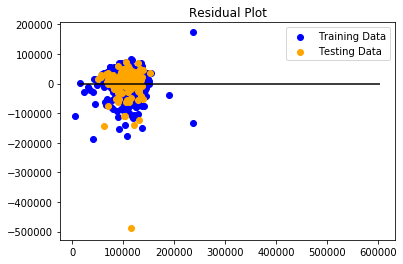

In [126]:
plt.scatter(model_2bdr.predict(X_train_2bdr), model_2bdr.predict(X_train_2bdr) - y_train_2bdr, c="blue", label="2 BDR Training Data")

plt.scatter(model_2bdr.predict(X_test_2bdr), model_2bdr.predict(X_test_2bdr) - y_test_2bdr, c="orange", label="2 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y.min(), xmax=y.max())

plt.title("2 BDR Residual Plot")

# PREDICT 3 BEDROOM HOUSE PRICES IN NORTH CAROLINA

## Find the median house prices for 3 BDRs from Zillow

In [44]:
# Read in the median house price data for 3 bedroom houses from zillow
zillow_3bdr = pd.read_csv('./static/data/Zip_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zillow_3bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,976021.0,...,1945737.0,1930647.0,1918358.0,1912831.0,1904208.0,1895108.0,1886062.0,1879163.0,1873173.0,1870230.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,257828.0,...,604460.0,602894.0,601747.0,600820.0,600775.0,601909.0,603650.0,604449.0,604373.0,604344.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,3248843.0,3247636.0,3244888.0,3226986.0,3218341.0,3211534.0,3215118.0,3205961.0,3206874.0,3206229.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,139236.0,...,255970.0,256194.0,256470.0,256662.0,256558.0,256533.0,256835.0,257802.0,258828.0,259490.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,320113.0,...,708596.0,707481.0,706163.0,704821.0,704312.0,703897.0,703822.0,702134.0,700427.0,698181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28876,71534,34430,31421,Zip,GA,GA,Savannah,Savannah,Chatham County,NaN,...,390075.0,389516.0,387368.0,385722.0,385803.0,386067.0,387186.0,386991.0,388215.0,388518.0
28877,59484,34430,4420,Zip,IA,IA,Ollie,NaN,Keokuk County,NaN,...,415122.0,417984.0,419795.0,419855.0,417394.0,413852.0,409316.0,405094.0,399207.0,392246.0
28878,69846,34430,28310,Zip,NC,NC,Fayetteville,Fayetteville,Cumberland County,NaN,...,40108.0,39691.0,39327.0,39015.0,38748.0,38523.0,38381.0,38416.0,38529.0,38536.0
28879,77449,34430,45114,Zip,OH,OH,Wilmington,Wilmington,Clinton County,NaN,...,103815.0,104205.0,104458.0,104334.0,103821.0,103638.0,103830.0,103617.0,102971.0,101857.0


In [45]:
# Reformat the date columns to reduce the number of columns for 3BDR dataset
df_3bdr = pd.melt(zillow_3bdr, id_vars=['RegionID', 
                                        'SizeRank', 
                                        'RegionName', 
                                        'RegionType', 
                                        'StateName',
                                        'State', 
                                        'City',
                                        'Metro', 
                                        'CountyName']) 

# Add a new column to identify number of bedrooms
df_3bdr["number_of_bedrooms"] = 3

# Convert date to "seconds to use in predictions
df_3bdr["variable"] = df_3bdr["variable"].astype('datetime64[m]')
df_3bdr["epoch"] = (df_3bdr["variable"] - dt.datetime(1970,1,1)).dt.total_seconds()

# Drop missing data
df_3bdr = df_3bdr.dropna(how="any")
df_3bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,number_of_bedrooms,epoch
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,976021.0,3,8.230464e+08
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,257828.0,3,8.230464e+08
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,139236.0,3,8.230464e+08
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,320113.0,3,8.230464e+08
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,89329.0,3,8.230464e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8491008,98400,34430,95721,Zip,CA,CA,Twin Bridges,Sacramento--Roseville--Arden-Arcade,El Dorado County,2020-06-30,314431.0,3,1.593475e+09
8491009,71534,34430,31421,Zip,GA,GA,Savannah,Savannah,Chatham County,2020-06-30,388518.0,3,1.593475e+09
8491011,69846,34430,28310,Zip,NC,NC,Fayetteville,Fayetteville,Cumberland County,2020-06-30,38536.0,3,1.593475e+09
8491012,77449,34430,45114,Zip,OH,OH,Wilmington,Wilmington,Clinton County,2020-06-30,101857.0,3,1.593475e+09


In [67]:
# Final 3 BDR dataset
df_3bdr_clean = df_3bdr[["RegionName", "State", "City", "variable", "value", "number_of_bedrooms", "epoch"]]

# Rename columns 
df_3bdr_clean.rename(columns={"RegionName": "zipcode",
                              "State": "state",
                              "City": "city",
                            "variable": "date",
                            "value": "median_house_price",
                            "epoch": "datenumeric"}, inplace = True)
df_3bdr_clean

,zipcode,state,city,date,median_house_price,number_of_bedrooms,datenumeric
0,10025,NY,New York,1996-01-31,976021.0,3,8.230464e+08
1,60657,IL,Chicago,1996-01-31,257828.0,3,8.230464e+08
3,77494,TX,Katy,1996-01-31,139236.0,3,8.230464e+08
4,60614,IL,Chicago,1996-01-31,320113.0,3,8.230464e+08
5,77449,TX,Katy,1996-01-31,89329.0,3,8.230464e+08
...,...,...,...,...,...,...,...
8491008,95721,CA,Twin Bridges,2020-06-30,314431.0,3,1.593475e+09
8491009,31421,GA,Savannah,2020-06-30,388518.0,3,1.593475e+09
8491011,28310,NC,Fayetteville,2020-06-30,38536.0,3,1.593475e+09
8491012,45114,OH,Wilmington,2020-06-30,101857.0,3,1.593475e+09


In [68]:
# Filter for 3BDRs in NC only
nc_3bdr = df_3bdr_clean[df_3bdr_clean['state']=='NC']

# Find Average 3BDR price in NC grouped by Zipcode
nc_3bdr_by_zipcode = nc_3bdr.groupby(["city","zipcode"])["median_house_price"].mean().reset_index(name="avg_house_price")
nc_3bdr_by_zipcode

,city,zipcode,avg_house_price
0,Aberdeen,28315,152390.688776
1,Advance,27006,203515.118280
2,Albemarle,28001,112205.683673
3,Alexander,28701,202563.962963
4,Alexis,28006,139996.357143
...,...,...,...
628,Yadkinville,27055,122836.272727
629,Youngsville,27596,165427.655290
630,Zebulon,27597,147983.479592
631,Zionville,28698,174710.979592


## Merge 3 BDR house prices data, schools data and census data

In [69]:
# Merge 3 BDR house prices data with the NC schools data
nc_3bdr_merged = pd.merge(nc_3bdr_by_zipcode, nc_schools_by_zipcode, on="zipcode")
nc_3bdr_merged

,city,zipcode,avg_house_price,number_of_schools
0,Aberdeen,28315,152390.688776,4
1,Advance,27006,203515.118280,2
2,Albemarle,28001,112205.683673,8
3,Angier,27501,137745.621528,5
4,Apex,27502,215726.292517,7
...,...,...,...,...
502,Wrightsville Beach,28480,867084.654762,1
503,Yadkinville,27055,122836.272727,4
504,Youngsville,27596,165427.655290,3
505,Zebulon,27597,147983.479592,5


In [88]:
# Merge 3 BDR house prices and schools data with the census data
nc_3bdr_final = pd.merge(nc_3bdr_merged, census_clean_df, on="zipcode")
nc_3bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,152390.688776,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,203515.118280,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,112205.683673,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,137745.621528,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,215726.292517,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
498,Wrightsville Beach,28480,867084.654762,1,2536.0,216.0,83417.0,8.517350
499,Yadkinville,27055,122836.272727,4,14131.0,1855.0,44574.0,13.127167
500,Youngsville,27596,165427.655290,3,18359.0,1624.0,70535.0,8.845798
501,Zebulon,27597,147983.479592,5,23538.0,2995.0,58514.0,12.724106


## Build the Linear regression model and predict house prices for 3 BDRs in NC

In [93]:
# Convert City to a cetegorical variable
nc_3bdr_final["city"] = nc_3bdr_final["city"].astype('category')
nc_3bdr_final["city"] = nc_3bdr_final["city"].cat.codes
nc_3bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,0,28315,152390.688776,4,13700.0,2826.0,51725.0,20.627737
1,1,27006,203515.118280,2,14555.0,932.0,78095.0,6.403298
2,2,28001,112205.683673,8,26601.0,5208.0,45121.0,19.578211
3,3,27501,137745.621528,5,21299.0,2601.0,56338.0,12.211841
4,4,27502,215726.292517,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
498,378,28480,867084.654762,1,2536.0,216.0,83417.0,8.517350
499,379,27055,122836.272727,4,14131.0,1855.0,44574.0,13.127167
500,380,27596,165427.655290,3,18359.0,1624.0,70535.0,8.845798
501,381,27597,147983.479592,5,23538.0,2995.0,58514.0,12.724106


# PREDICT 4 BEDROOM HOUSE PRICES IN NORTH CAROLINA

## Find the median house prices for 4 BDRs from Zillow

In [47]:
# Read in the median house price data for 4 bedroom houses from zillow
zillow_4bdr = pd.read_csv('./static/data/Zip_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zillow_4bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,3064324.0,3053163.0,3031928.0,3032413.0,3037638.0,3038871.0,3031707.0,3013141.0,3005806.0,3011777.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,398286.0,...,1007829.0,1007140.0,1005980.0,1004071.0,1002907.0,1002515.0,1002070.0,1000673.0,998107.0,995198.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,6418574.0,6453737.0,6476901.0,6488955.0,6440409.0,6386920.0,6323189.0,6289909.0,6238680.0,6221807.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,190908.0,...,335594.0,335558.0,335428.0,335402.0,335042.0,335201.0,335626.0,336623.0,337462.0,337961.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,515152.0,...,1251896.0,1249248.0,1246234.0,1243491.0,1242884.0,1245305.0,1247131.0,1247754.0,1245511.0,1245141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26767,75095,34430,38959,Zip,MS,MS,Inverness,Indianola,Sunflower County,NaN,...,43018.0,43122.0,42664.0,42216.0,41628.0,41398.0,41108.0,41054.0,40842.0,40539.0
26768,58866,34430,2714,Zip,MA,MA,Dartmouth,Providence-Warwick,Bristol County,NaN,...,921437.0,922418.0,920953.0,918615.0,918869.0,922750.0,925374.0,929900.0,936778.0,946942.0
26769,95186,34430,86343,Zip,AZ,AZ,Crown King,Prescott,Yavapai County,NaN,...,271773.0,270873.0,269586.0,268248.0,268068.0,265871.0,262719.0,259027.0,253452.0,249801.0
26770,66881,34430,21405,Zip,MD,MD,Annapolis,Baltimore-Columbia-Towson,Anne Arundel County,411757.0,...,915093.0,916294.0,918597.0,917897.0,914413.0,910389.0,911260.0,910694.0,910090.0,910535.0


In [49]:
# Reformat the date columns to reduce the number of columns for 4BDR dataset
df_4bdr = pd.melt(zillow_4bdr, id_vars=['RegionID', 
                                        'SizeRank', 
                                        'RegionName', 
                                        'RegionType', 
                                        'StateName',
                                        'State', 
                                        'City',
                                        'Metro', 
                                        'CountyName']) 

# Add a new column to identify number of bedrooms
df_4bdr["number_of_bedrooms"] = 4

# Convert date to "seconds to use in predictions
df_4bdr["variable"] = df_4bdr["variable"].astype('datetime64[m]')
df_4bdr["epoch"] = (df_4bdr["variable"] - dt.datetime(1970,1,1)).dt.total_seconds()

# Drop missing data
df_4bdr = df_4bdr.dropna(how="any")
df_4bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,number_of_bedrooms,epoch
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,398286.0,4,8.230464e+08
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,190908.0,4,8.230464e+08
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,515152.0,4,8.230464e+08
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,107388.0,4,8.230464e+08
7,91733,7,77084,Zip,TX,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,115424.0,4,8.230464e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7870963,75095,34430,38959,Zip,MS,MS,Inverness,Indianola,Sunflower County,2020-06-30,40539.0,4,1.593475e+09
7870964,58866,34430,2714,Zip,MA,MA,Dartmouth,Providence-Warwick,Bristol County,2020-06-30,946942.0,4,1.593475e+09
7870965,95186,34430,86343,Zip,AZ,AZ,Crown King,Prescott,Yavapai County,2020-06-30,249801.0,4,1.593475e+09
7870966,66881,34430,21405,Zip,MD,MD,Annapolis,Baltimore-Columbia-Towson,Anne Arundel County,2020-06-30,910535.0,4,1.593475e+09


In [60]:
# Final 4BDR dataset
df_4bdr_clean = df_4bdr[["RegionName", "State", "City", "variable", "value", "number_of_bedrooms", "epoch"]]

# Rename columns 
df_4bdr_clean.rename(columns={"RegionName": "zipcode",
                              "State": "state",
                              "City": "city",
                            "variable": "date",
                            "value": "median_house_price",
                            "epoch": "datenumeric"}, inplace = True)
df_4bdr_clean

,zipcode,state,city,date,median_house_price,number_of_bedrooms,datenumeric
1,60657,IL,Chicago,1996-01-31,398286.0,4,8.230464e+08
3,77494,TX,Katy,1996-01-31,190908.0,4,8.230464e+08
4,60614,IL,Chicago,1996-01-31,515152.0,4,8.230464e+08
5,77449,TX,Katy,1996-01-31,107388.0,4,8.230464e+08
7,77084,TX,Houston,1996-01-31,115424.0,4,8.230464e+08
...,...,...,...,...,...,...,...
7870963,38959,MS,Inverness,2020-06-30,40539.0,4,1.593475e+09
7870964,2714,MA,Dartmouth,2020-06-30,946942.0,4,1.593475e+09
7870965,86343,AZ,Crown King,2020-06-30,249801.0,4,1.593475e+09
7870966,21405,MD,Annapolis,2020-06-30,910535.0,4,1.593475e+09


In [61]:
# Filter for 4BDRs in NC only
nc_4bdr = df_4bdr_clean[df_4bdr_clean['state']=='NC']

# Find Average 4BDR price in NC grouped by Zipcode
nc_4bdr_by_zipcode = nc_4bdr.groupby(["city","zipcode"])["median_house_price"].mean().reset_index(name="avg_house_price")
nc_4bdr_by_zipcode

,city,zipcode,avg_house_price
0,Aberdeen,28315,216032.025510
1,Advance,27006,322164.619565
2,Albemarle,28001,161291.037415
3,Alexander,28701,270758.307407
4,Alexis,28006,252734.003731
...,...,...,...
610,Yadkinville,27055,169151.543011
611,Youngsville,27596,237543.925170
612,Zebulon,27597,207699.343537
613,Zionville,28698,230760.395522


## Merge the 4 BDR house prices with schools and census data

In [70]:
# Merge 4 BDR house prices data with the NC schools data
nc_4bdr_merged = pd.merge(nc_4bdr_by_zipcode, nc_schools_by_zipcode, on="zipcode")
nc_4bdr_merged

,city,zipcode,avg_house_price,number_of_schools
0,Aberdeen,28315,2.160320e+05,4
1,Advance,27006,3.221646e+05,2
2,Albemarle,28001,1.612910e+05,8
3,Angier,27501,2.092624e+05,5
4,Apex,27502,2.822962e+05,7
...,...,...,...,...
498,Wrightsville Beach,28480,1.119684e+06,1
499,Yadkinville,27055,1.691515e+05,4
500,Youngsville,27596,2.375439e+05,3
501,Zebulon,27597,2.076993e+05,5


In [89]:
# Merge 4 BDR house prices and schools data with the census data
nc_4bdr_final = pd.merge(nc_4bdr_merged, census_clean_df, on="zipcode")
nc_4bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,2.160320e+05,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,3.221646e+05,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,1.612910e+05,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,2.092624e+05,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,2.822962e+05,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
497,Wrightsville Beach,28480,1.119684e+06,1,2536.0,216.0,83417.0,8.517350
498,Yadkinville,27055,1.691515e+05,4,14131.0,1855.0,44574.0,13.127167
499,Youngsville,27596,2.375439e+05,3,18359.0,1624.0,70535.0,8.845798
500,Zebulon,27597,2.076993e+05,5,23538.0,2995.0,58514.0,12.724106


## Build the Linear regression model and predict house prices for 4 BDRs in NC

In [94]:
# Convert City to a cetegorical variable
nc_4bdr_final["city"] = nc_4bdr_final["city"].astype('category')
nc_4bdr_final["city"] = nc_4bdr_final["city"].cat.codes
nc_4bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,0,28315,2.160320e+05,4,13700.0,2826.0,51725.0,20.627737
1,1,27006,3.221646e+05,2,14555.0,932.0,78095.0,6.403298
2,2,28001,1.612910e+05,8,26601.0,5208.0,45121.0,19.578211
3,3,27501,2.092624e+05,5,21299.0,2601.0,56338.0,12.211841
4,4,27502,2.822962e+05,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
497,377,28480,1.119684e+06,1,2536.0,216.0,83417.0,8.517350
498,378,27055,1.691515e+05,4,14131.0,1855.0,44574.0,13.127167
499,379,27596,2.375439e+05,3,18359.0,1624.0,70535.0,8.845798
500,380,27597,2.076993e+05,5,23538.0,2995.0,58514.0,12.724106


# PREDICT 5 BEDROOM HOUSE PRICES IN NORTH CAROLINA

In [51]:
# Read in the median house price data for 5 bedroom houses from zillow
zillow_5bdr = pd.read_csv('./static/data/Zip_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zillow_5bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,3448246.0,3435998.0,3395436.0,3357463.0,3357765.0,3416324.0,3469544.0,3484173.0,3510843.0,3586703.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,NaN,...,1515372.0,1512706.0,1509594.0,1507032.0,1507035.0,1508901.0,1511288.0,1512041.0,1511849.0,1512165.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,10164538.0,10084234.0,10090482.0,10118522.0,10150628.0,10066628.0,9884157.0,9684741.0,9568966.0,9571718.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,249879.0,...,465177.0,465458.0,465855.0,466333.0,466032.0,466292.0,467250.0,468965.0,470630.0,471645.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,735019.0,...,1948791.0,1943860.0,1936691.0,1932635.0,1929663.0,1932982.0,1934695.0,1935368.0,1933888.0,1936368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22419,66881,34430,21405,Zip,MD,MD,Annapolis,Baltimore-Columbia-Towson,Anne Arundel County,521276.0,...,1180823.0,1188312.0,1197358.0,1200634.0,1197929.0,1192394.0,1193131.0,1193137.0,1194109.0,1194706.0
22420,59376,34430,4109,Zip,ME,ME,Portland,Portland-South Portland,Cumberland County,NaN,...,822242.0,826893.0,830511.0,833086.0,838782.0,844713.0,855310.0,864491.0,873382.0,880405.0
22421,59316,34430,4033,Zip,ME,ME,Cumberland,Portland-South Portland,Cumberland County,NaN,...,944541.0,952003.0,958936.0,969140.0,975855.0,984791.0,994679.0,1005238.0,1019728.0,1026942.0
22422,95851,34430,89155,Zip,NV,NV,Las Vegas,Las Vegas-Henderson-Paradise,Clark County,227204.0,...,418335.0,419559.0,421495.0,423114.0,425041.0,426114.0,428788.0,430180.0,431161.0,430695.0


In [52]:
# Reformat the date columns to reduce the number of columns for 5BDR dataset
df_5bdr = pd.melt(zillow_5bdr, id_vars=['RegionID', 
                                        'SizeRank', 
                                        'RegionName', 
                                        'RegionType', 
                                        'StateName',
                                        'State', 
                                        'City',
                                        'Metro', 
                                        'CountyName']) 

# Add a new column to identify number of bedrooms
df_5bdr["number_of_bedrooms"] = 5

# Convert date to "seconds to use in predictions
df_5bdr["variable"] = df_5bdr["variable"].astype('datetime64[m]')
df_5bdr["epoch"] = (df_5bdr["variable"] - dt.datetime(1970,1,1)).dt.total_seconds()

# Drop missing data
df_5bdr = df_5bdr.dropna(how="any")
df_5bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,number_of_bedrooms,epoch
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,249879.0,5,8.230464e+08
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,735019.0,5,8.230464e+08
5,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,125650.0,5,8.230464e+08
6,91733,7,77084,Zip,TX,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,134071.0,5,8.230464e+08
7,93144,8,79936,Zip,TX,TX,El Paso,El Paso,El Paso County,1996-01-31,175495.0,5,8.230464e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592651,66881,34430,21405,Zip,MD,MD,Annapolis,Baltimore-Columbia-Towson,Anne Arundel County,2020-06-30,1194706.0,5,1.593475e+09
6592652,59376,34430,4109,Zip,ME,ME,Portland,Portland-South Portland,Cumberland County,2020-06-30,880405.0,5,1.593475e+09
6592653,59316,34430,4033,Zip,ME,ME,Cumberland,Portland-South Portland,Cumberland County,2020-06-30,1026942.0,5,1.593475e+09
6592654,95851,34430,89155,Zip,NV,NV,Las Vegas,Las Vegas-Henderson-Paradise,Clark County,2020-06-30,430695.0,5,1.593475e+09


In [62]:
# Final 5BDR dataset
df_5bdr_clean = df_5bdr[["RegionName", "State", "City", "variable", "value", "number_of_bedrooms", "epoch"]]

# Rename columns 
df_5bdr_clean.rename(columns={"RegionName": "zipcode",
                              "State": "state",
                              "City": "city",
                            "variable": "date",
                            "value": "median_house_price",
                            "epoch": "datenumeric"}, inplace = True)
df_5bdr_clean

,zipcode,state,city,date,median_house_price,number_of_bedrooms,datenumeric
3,77494,TX,Katy,1996-01-31,249879.0,5,8.230464e+08
4,60614,IL,Chicago,1996-01-31,735019.0,5,8.230464e+08
5,77449,TX,Katy,1996-01-31,125650.0,5,8.230464e+08
6,77084,TX,Houston,1996-01-31,134071.0,5,8.230464e+08
7,79936,TX,El Paso,1996-01-31,175495.0,5,8.230464e+08
...,...,...,...,...,...,...,...
6592651,21405,MD,Annapolis,2020-06-30,1194706.0,5,1.593475e+09
6592652,4109,ME,Portland,2020-06-30,880405.0,5,1.593475e+09
6592653,4033,ME,Cumberland,2020-06-30,1026942.0,5,1.593475e+09
6592654,89155,NV,Las Vegas,2020-06-30,430695.0,5,1.593475e+09


In [63]:
# Filter for 5BDRs in NC only
nc_5bdr = df_5bdr_clean[df_5bdr_clean['state']=='NC']

# Find Average 4BDR price in NC grouped by Zipcode
nc_5bdr_by_zipcode = nc_5bdr.groupby(["city","zipcode"])["median_house_price"].mean().reset_index(name="avg_house_price")
nc_5bdr_by_zipcode

,city,zipcode,avg_house_price
0,Aberdeen,28315,256666.107143
1,Advance,27006,420614.217391
2,Albemarle,28001,193832.969388
3,Alexander,28701,387356.405797
4,Alexis,28006,327069.064516
...,...,...,...
540,Yadkinville,27055,239051.993333
541,Youngsville,27596,290807.523810
542,Zebulon,27597,228846.389078
543,Zionville,28698,852329.142857


## Merge 5 BDR house prices data with schools and census data

In [71]:
# Merge 5 BDR house prices data with the NC schools data
nc_5bdr_merged = pd.merge(nc_5bdr_by_zipcode, nc_schools_by_zipcode, on="zipcode")
nc_5bdr_merged

,city,zipcode,avg_house_price,number_of_schools
0,Aberdeen,28315,2.566661e+05,4
1,Advance,27006,4.206142e+05,2
2,Albemarle,28001,1.938330e+05,8
3,Angier,27501,2.580105e+05,5
4,Apex,27502,3.770457e+05,7
...,...,...,...,...
466,Wrightsville Beach,28480,1.574379e+06,1
467,Yadkinville,27055,2.390520e+05,4
468,Youngsville,27596,2.908075e+05,3
469,Zebulon,27597,2.288464e+05,5


In [90]:
# Merge 5 BDR house prices and schools data with the census data
nc_5bdr_final = pd.merge(nc_5bdr_merged, census_clean_df, on="zipcode")
nc_5bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,2.566661e+05,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,4.206142e+05,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,1.938330e+05,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,2.580105e+05,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,3.770457e+05,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
466,Wrightsville Beach,28480,1.574379e+06,1,2536.0,216.0,83417.0,8.517350
467,Yadkinville,27055,2.390520e+05,4,14131.0,1855.0,44574.0,13.127167
468,Youngsville,27596,2.908075e+05,3,18359.0,1624.0,70535.0,8.845798
469,Zebulon,27597,2.288464e+05,5,23538.0,2995.0,58514.0,12.724106


## Build the Linear regression model and predict house prices for 5 BDRs in NC

In [95]:
# Convert City to a cetegorical variable
nc_5bdr_final["city"] = nc_5bdr_final["city"].astype('category')
nc_5bdr_final["city"] = nc_5bdr_final["city"].cat.codes
nc_5bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,0,28315,2.566661e+05,4,13700.0,2826.0,51725.0,20.627737
1,1,27006,4.206142e+05,2,14555.0,932.0,78095.0,6.403298
2,2,28001,1.938330e+05,8,26601.0,5208.0,45121.0,19.578211
3,3,27501,2.580105e+05,5,21299.0,2601.0,56338.0,12.211841
4,4,27502,3.770457e+05,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
466,347,28480,1.574379e+06,1,2536.0,216.0,83417.0,8.517350
467,348,27055,2.390520e+05,4,14131.0,1855.0,44574.0,13.127167
468,349,27596,2.908075e+05,3,18359.0,1624.0,70535.0,8.845798
469,350,27597,2.288464e+05,5,23538.0,2995.0,58514.0,12.724106
